In [2]:
import os
import cv2
import numpy as np
import tensorflow as tf
import keras
from collections import Counter
import matplotlib.pyplot as plt
 
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [3]:
print(tf.__version__)
print(keras.__version__)


2.15.0
3.0.5


### Spécification du chemin pour chaque classe

In [4]:
NonViolnce_Path = "../input/real-life-violence-situations-dataset/Real Life Violence Dataset/NonViolence/"
Violnce_Path = "../input/real-life-violence-situations-dataset/Real Life Violence Dataset/Violence/"

In [5]:
NonViolence_vnames = os.listdir(NonViolnce_Path)
Violence_vnames = os.listdir(Violnce_Path)

### Comptant le nombre de frames pour chaque vidéo

In [6]:
def video_frame_counts(filename):
    video = cv2.VideoCapture(filename)
    frame_count = video.get(cv2.CAP_PROP_FRAME_COUNT)

    return frame_count

def frame_counts(path, video_names):
    frmaes_counts=[]
    for name in video_names:
        file_path=f"{path}/{name}"
        frame_count= video_frame_counts(file_path)
        frmaes_counts+=[frame_count]
    return frmaes_counts

In [7]:
NonViolenceFramesCounts_list = frame_counts(NonViolnce_Path, NonViolence_vnames)
print("Non Violence Frames Counts : ",Counter(NonViolenceFramesCounts_list))

Non Violence Frames Counts :  Counter({125.0: 246, 145.0: 163, 115.0: 128, 150.0: 96, 55.0: 90, 105.0: 34, 120.0: 26, 123.0: 13, 108.0: 13, 135.0: 12, 138.0: 11, 113.0: 10, 133.0: 9, 129.0: 8, 110.0: 8, 95.0: 8, 128.0: 7, 132.0: 7, 144.0: 6, 114.0: 6, 137.0: 4, 147.0: 4, 103.0: 4, 140.0: 3, 134.0: 3, 93.0: 3, 124.0: 3, 154.0: 3, 100.0: 3, 118.0: 3, 130.0: 3, 156.0: 2, 159.0: 2, 171.0: 2, 88.0: 2, 180.0: 2, 87.0: 2, 107.0: 2, 111.0: 2, 168.0: 2, 174.0: 2, 141.0: 2, 126.0: 2, 153.0: 2, 161.0: 2, 104.0: 2, 117.0: 1, 186.0: 1, 163.0: 1, 119.0: 1, 86.0: 1, 152.0: 1, 148.0: 1, 70.0: 1, 162.0: 1, 36.0: 1, 198.0: 1, 201.0: 1, 29.0: 1, 73.0: 1, 77.0: 1, 155.0: 1, 158.0: 1, 164.0: 1, 90.0: 1, 50.0: 1, 112.0: 1, 109.0: 1, 127.0: 1, 204.0: 1, 85.0: 1, 139.0: 1, 146.0: 1, 63.0: 1, 177.0: 1, 66.0: 1, 98.0: 1, 5397.0: 1, 78.0: 1})


In [8]:
ViolenceFramesCounts_list= frame_counts(Violnce_Path, Violence_vnames)
print("Violence Frames Counts : ",Counter(ViolenceFramesCounts_list))

Violence Frames Counts :  Counter({150.0: 129, 185.0: 97, 125.0: 77, 153.0: 56, 156.0: 48, 129.0: 41, 141.0: 33, 144.0: 33, 177.0: 33, 138.0: 29, 132.0: 25, 115.0: 25, 162.0: 25, 147.0: 25, 120.0: 22, 126.0: 21, 168.0: 20, 123.0: 20, 117.0: 18, 108.0: 17, 135.0: 16, 159.0: 14, 114.0: 13, 165.0: 11, 111.0: 10, 171.0: 9, 105.0: 9, 180.0: 8, 143.0: 7, 122.0: 6, 140.0: 6, 102.0: 5, 174.0: 5, 124.0: 4, 186.0: 4, 128.0: 3, 90.0: 3, 96.0: 3, 98.0: 3, 92.0: 3, 100.0: 3, 189.0: 3, 183.0: 3, 107.0: 3, 112.0: 3, 136.0: 2, 62.0: 2, 133.0: 2, 137.0: 2, 139.0: 2, 222.0: 2, 210.0: 2, 106.0: 2, 119.0: 2, 78.0: 1, 87.0: 1, 110.0: 1, 84.0: 1, 113.0: 1, 88.0: 1, 93.0: 1, 131.0: 1, 121.0: 1, 145.0: 1, 142.0: 1, 94.0: 1, 170.0: 1, 176.0: 1, 85.0: 1, 283.0: 1, 74.0: 1, 213.0: 1, 161.0: 1, 201.0: 1, 192.0: 1, 11272.0: 1, 154.0: 1, 228.0: 1, 195.0: 1, 76.0: 1, 4109.0: 1, 70.0: 1, 99.0: 1, 151.0: 1, 103.0: 1})


### Visualisation de nombre de frames pour les videos

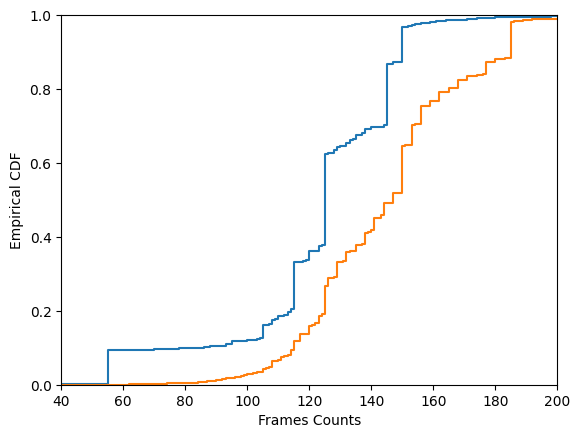

In [9]:
from scipy import stats
res0 = stats.ecdf(NonViolenceFramesCounts_list)
res1 = stats.ecdf(ViolenceFramesCounts_list)

ax = plt.subplot()
res0.cdf.plot(ax)
res1.cdf.plot(ax)
ax.set_xlabel('Frames Counts')
ax.set_ylabel('Empirical CDF')

plt.axis([40,200,0,1])
plt.show()

### Transformation des videos en frames d'images

In [10]:
NB_IMGS_FROM_VID = 15
IMAGE_HEIGHT , IMAGE_WIDTH = 64, 64

In [11]:
def video_to_frames(video_path):
 
    video_reader = cv2.VideoCapture(video_path)
    frames_count = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))
    pas = max(int(frames_count/NB_IMGS_FROM_VID), 1)
    
    frames = []

    for i in range(NB_IMGS_FROM_VID):
        video_reader.set(cv2.CAP_PROP_POS_FRAMES, i * pas)
        success, frame = video_reader.read() 
        if not success:
            break
        resized_frame = cv2.resize(frame, (IMAGE_HEIGHT, IMAGE_WIDTH))
        
        #Normalisation
        normalized_frame = resized_frame / 255
        
        frames.append(normalized_frame)
    
 
    video_reader.release()
    return frames

### Creation du Dataset

In [12]:
def dataset_creation(path,video_names,class_index):
 
    features = []
    labels = []
    video_paths = []
    
    for name in video_names:
        file_path=f"{path}/{name}"
        frames = video_to_frames(file_path)
        
        if len(frames) == NB_IMGS_FROM_VID:
            features.append(frames)
            labels.append(class_index)
            video_paths.append(file_path)
    features = np.asarray(features)
    labels = np.array(labels)  

    return features, labels, video_paths

In [13]:
features_non_violence, labels_non_violence, video_paths_non_violence = dataset_creation(NonViolnce_Path, NonViolence_vnames,0)
features_violence, labels_violence, video_paths_violence = dataset_creation(Violnce_Path, Violence_vnames,1)

[h264 @ 0x5c1eda24ca80] mb_type 104 in P slice too large at 98 31
[h264 @ 0x5c1eda24ca80] error while decoding MB 98 31
[h264 @ 0x5c1eda24ca80] mb_type 104 in P slice too large at 98 31
[h264 @ 0x5c1eda24ca80] error while decoding MB 98 31
[h264 @ 0x5c1eda24ca80] mb_type 104 in P slice too large at 98 31
[h264 @ 0x5c1eda24ca80] error while decoding MB 98 31
[h264 @ 0x5c1eda24ca80] mb_type 104 in P slice too large at 98 31
[h264 @ 0x5c1eda24ca80] error while decoding MB 98 31


In [14]:
features = np.concatenate((features_non_violence, features_violence))
labels = np.concatenate((labels_non_violence,labels_violence))
video_paths = np.concatenate((video_paths_non_violence,video_paths_violence))

In [15]:
#labels[:100]

### Sauvegarde du Dataset

In [16]:
np.save("features.npy",features)
np.save("labels.npy",labels)
np.save("video_paths.npy",video_paths)

In [17]:
features, labels, video_paths = np.load("features.npy") , np.load("labels.npy") ,  np.load("video_paths.npy")

In [18]:
print(features.shape,labels.shape)

(2000, 15, 64, 64, 3) (2000,)


In [19]:
#features_train = np.concatenate((features[:850] , features[1150:]))
#labels_train = np.concatenate((labels[:850] , labels[1150:]))

In [20]:
#features_test = np.concatenate((features[850:1000] , features[1000:1150]))
#labels_test = np.concatenate((labels[850:1000] , labels[1000:1150]))

### Encoding

In [21]:
one_hot_encoded_labels = to_categorical(labels)

### Spliting

In [22]:
features_train, features_test, labels_train, labels_test = train_test_split(features, one_hot_encoded_labels, test_size = 0.11,
                                                                            shuffle = True, random_state = 23)

In [23]:
print(features_train.shape,labels_train.shape)
print(features_test.shape, labels_test.shape)

(1780, 15, 64, 64, 3) (1780, 2)
(220, 15, 64, 64, 3) (220, 2)


In [24]:
labels_train[:10]

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.]])

### Classification : CNN-LSTM

In [25]:
def build_model():
    cnn_model = tf.keras.models.Sequential()
    cnn_model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3)))
    cnn_model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    cnn_model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
    cnn_model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    cnn_model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
    cnn_model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    cnn_model.add(tf.keras.layers.Flatten())

    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.TimeDistributed(cnn_model, input_shape=(NB_IMGS_FROM_VID, IMAGE_HEIGHT, IMAGE_WIDTH, 3)))
    model.add(tf.keras.layers.LSTM(64, return_sequences=True))
    model.add(tf.keras.layers.LSTM(64))

    # Add a Dense layer for classification
    model.add(tf.keras.layers.Dense(2, activation='sigmoid'))
    
    return model


In [26]:
my_model=build_model()
my_model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ time_distributed                │ ?                      │        93,248 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,248 (364.25 KB)

 Trainable params: 93,248 (364.25 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
my_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Training : CNN-LSTM

In [28]:
mod = my_model.fit(features_train, labels_train,shuffle = True, epochs=10, batch_size=32)

Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 11s 68ms/step - accuracy: 0.5246 - loss: 0.6955
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.6668 - loss: 0.6068
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.7145 - loss: 0.5398
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.8268 - loss: 0.3969
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.8317 - loss: 0.3782
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.8641 - loss: 0.3121
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.8896 - loss: 0.2555
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.9212 - loss: 0.2024
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.9415 - loss: 0.1608
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.9552 - loss: 0.1254


### Training Accuracy : CNN-LSTM

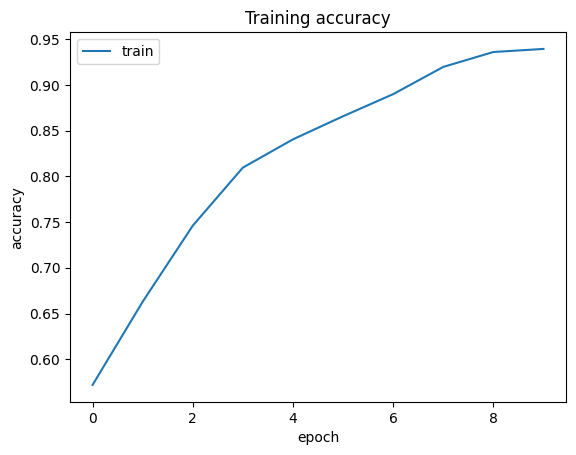

In [29]:
plt.plot(mod.history['accuracy'])
plt.title('Training accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [30]:
labels_predict_crnn = my_model.predict(features_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 165ms/step


In [31]:
labels_test_n = np.argmax(labels_test , axis=1)

In [32]:
labels_predict_crnn_n = np.argmax(labels_predict_crnn , axis=1)

### Test Accuracy : CNN-LSTM

In [33]:
from sklearn.metrics import accuracy_score
AccScore = accuracy_score(labels_predict_crnn_n, labels_test_n)
print('Accuracy Score for CRNN is : ', AccScore)

Accuracy Score for CRNN is :  0.8590909090909091


### Confusion Matrix : CNN-LSTM

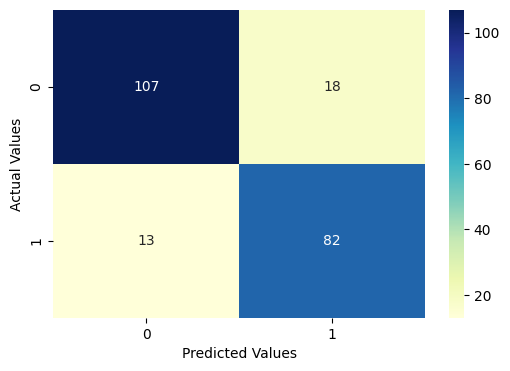

In [34]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

confusion_matrix1 = confusion_matrix(labels_test_n, labels_predict_crnn_n)

plt.figure(figsize=(6, 4))  
sns.heatmap(confusion_matrix1, annot=True, cmap='YlGnBu' ,fmt='d')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.show()

### Classification : MobileNet-LSTM

In [35]:
from keras.applications.mobilenet_v2 import MobileNetV2

mobilenet = MobileNetV2(include_top=False , weights="imagenet")
mobilenet.trainable=True
for layer in mobilenet.layers[:-40]:
  layer.trainable=False

/tmp/ipykernel_34703/3703757780.py:3: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  mobilenet = MobileNetV2(include_top=False , weights="imagenet")


In [36]:
def model_creation():
 
    model = tf.keras.models.Sequential()
    
    model.add(tf.keras.layers.Input(shape = (NB_IMGS_FROM_VID, IMAGE_HEIGHT, IMAGE_WIDTH, 3)))
    model.add(tf.keras.layers.TimeDistributed(mobilenet))
    model.add(tf.keras.layers.Dropout(0.2))  
    model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Flatten()))
    model.add(tf.keras.layers.Bidirectional(keras.layers.LSTM(units=32)))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(256,activation='relu'))
    model.add(tf.keras.layers.Dropout(0.25))
    model.add(tf.keras.layers.Dense(128,activation='relu'))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(64,activation='relu'))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(32,activation='relu'))
    model.add(tf.keras.layers.Dropout(0.2))
    
    model.add(tf.keras.layers.Dense(2, activation = 'softmax'))
    model.summary()
    
    return model

In [37]:
model_mobilnet = model_creation()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ time_distributed_1              │ ?                      │     2,257,984 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_2              │ ?                      │   0 (unbuilt) │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 1,681,536 (6.41 MB)

 Non-trainable params: 576,448 (2.20 MB)

In [38]:
model_mobilnet.compile(loss='categorical_crossentropy', optimizer = 'sgd', metrics = ["accuracy"])

### Training : MobileNet-LSTM

In [39]:
model_history = model_mobilnet.fit(features_train, labels_train, epochs = 15, batch_size = 8 ,
                                            shuffle = True)

Epoch 1/15
223/223 ━━━━━━━━━━━━━━━━━━━━ 127s 154ms/step - accuracy: 0.5414 - loss: 0.6874
Epoch 2/15
223/223 ━━━━━━━━━━━━━━━━━━━━ 34s 151ms/step - accuracy: 0.6251 - loss: 0.6506
Epoch 3/15
223/223 ━━━━━━━━━━━━━━━━━━━━ 41s 151ms/step - accuracy: 0.7575 - loss: 0.5268
Epoch 4/15
223/223 ━━━━━━━━━━━━━━━━━━━━ 34s 151ms/step - accuracy: 0.8257 - loss: 0.4067
Epoch 5/15
223/223 ━━━━━━━━━━━━━━━━━━━━ 34s 150ms/step - accuracy: 0.8707 - loss: 0.3363
Epoch 6/15
223/223 ━━━━━━━━━━━━━━━━━━━━ 34s 151ms/step - accuracy: 0.9002 - loss: 0.2838
Epoch 7/15
223/223 ━━━━━━━━━━━━━━━━━━━━ 34s 152ms/step - accuracy: 0.9190 - loss: 0.2303
Epoch 8/15
223/223 ━━━━━━━━━━━━━━━━━━━━ 34s 151ms/step - accuracy: 0.9304 - loss: 0.2149
Epoch 9/15
223/223 ━━━━━━━━━━━━━━━━━━━━ 34s 151ms/step - accuracy: 0.9255 - loss: 0.2205
Epoch 10/15
223/223 ━━━━━━━━━━━━━━━━━━━━ 34s 151ms/step - accuracy: 0.9362 - loss: 0.1815
Epoch 11/15
223/223 ━━━━━━━━━━━━━━━━━━━━ 34s 152ms/step - accuracy: 0.9419 - loss: 0.1620
Epoch 12/15
223/22

### Training Accuracy : MobileNet-LSTM

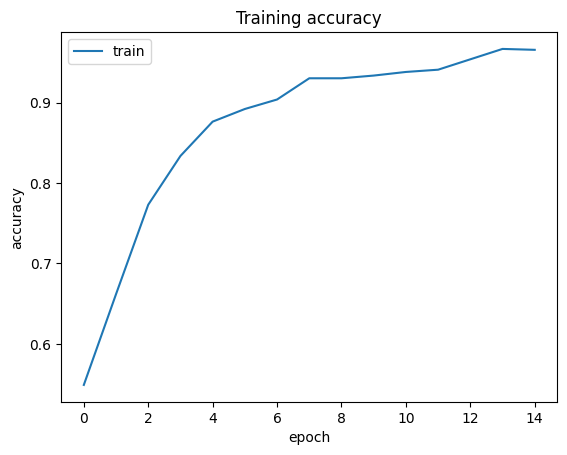

In [40]:
plt.plot(model_history.history['accuracy'])
plt.title('Training accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [41]:
labels_predict_mobilnet = model_mobilnet.predict(features_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 37s 3s/step


In [42]:
labels_predict_mobilnet_n = np.argmax(labels_predict_mobilnet , axis=1)

### Test Accuracy : MobileNet-LSTM

In [43]:
from sklearn.metrics import accuracy_score
AccScore = accuracy_score(labels_predict_mobilnet_n, labels_test_n)
print('Accuracy Score for mobilnet lstm is : ', AccScore)

Accuracy Score for mobilnet lstm is :  0.9272727272727272


### Confusion Matrix : MobileNet-LSTM

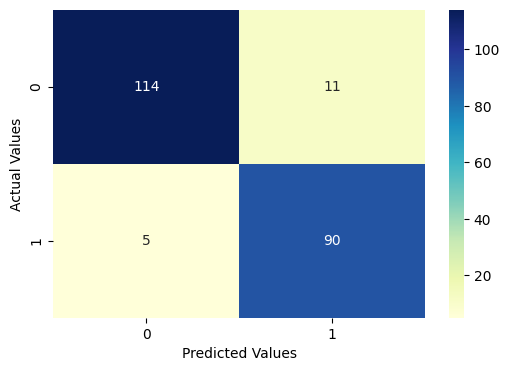

In [44]:

from sklearn.metrics import confusion_matrix
confusion_matrix2 = confusion_matrix(labels_test_n, labels_predict_mobilnet_n)

plt.figure(figsize=(6, 4))  
sns.heatmap(confusion_matrix2, annot=True, cmap='YlGnBu' ,fmt='d')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.show()

### Testing en utilisant une vidéo

In [45]:
from IPython.display import HTML
from base64 import b64encode

def Play_Video(filepath):
    html = ''
    video = open(filepath,'rb').read()
    src = 'data:video/mp4;base64,' + b64encode(video).decode()
    html += '<video width=640 muted controls autoplay loop><source src="%s" type="video/mp4"></video>' % src 
    return HTML(html)

In [46]:
Play_Video("../input/vid-test/vid_street_fight.mp4")

In [47]:
vid_test_frames=video_to_frames("../input/vid-test/vid_street_fight.mp4")
vid_test = np.expand_dims(vid_test_frames, axis = 0)

In [48]:
vid_test_crnn = my_model.predict(vid_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


In [49]:
vid_test_mobilnet = model_mobilnet.predict(vid_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 775ms/step


In [50]:
# index 0: NonViolence
# index 1: Violence

print("prediction using crnn : ",vid_test_crnn)
print("prediction using mobilnet lstm : ",vid_test_mobilnet)

prediction using crnn :  [[0.30281693 0.8174139 ]]
prediction using mobilnet lstm :  [[0.02355013 0.9764499 ]]


### Sauvegarde des models

In [51]:
model_mobilnet.save('model_mobilnet.keras')

In [52]:
my_model.save('model_cnn_lstm.keras')